In [1]:
#install.packages("nnet")
#install.packages("pROC")
library("caret")
library("nnet")
library("pROC")

#functions
MSE = function(y_x, t) {
    return(mean(0.5*(t-y_x)^2))
}
crossEntropy = function(y_x, t) {
    return(sum(-t*log(y_x)-(1-t)*log(1-y_x)))
}

Loading required package: lattice
Loading required package: ggplot2
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [2]:
source("../helpfuncs/BADS-HelperFunctions.R")
loans = get.loan.dataset("../data/Loan_Data.csv")

In [3]:
N_all = nrow(loans)
loans.shuffled = loans[sample(N_all),]
validation_.idx = sample(N_all,floor(0.2 * N_all))
validation_ = loans.shuffled[validation_.idx,]
train_test_ = loans.shuffled[-validation_.idx,]

N = nrow(train_test_)
k = 5
folds = cut(1:N, breaks = k, labels = F)
folds

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[408] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[445] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[482] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[519] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[556] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
[593] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[630] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[667] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[704] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[741] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[778] 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[815] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[852] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[889] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[926] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[963] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5

In [36]:
nnet.sizes = c(3, 6, 9, 12, 15) # 
errors.nodecay = array(rep(NaN, length(nnet.sizes)*k),c(length(nnet.sizes),k))
errors.decay = array(rep(NaN, length(nnet.sizes)*k),c(length(nnet.sizes),k))
for(s in 1:length(nnet.sizes)) {
    nn.size = nnet.sizes[s]
    for(i in 1:k) {
        test_.idx = which(folds == i, arr.ind = TRUE) # what is "arr.ind = TRUE" in which function
        test_ = train_test_[test_.idx, ]
        train_ = train_test_[-test_.idx, ]
        model.nnet = nnet(BAD ~ ., data = train_, size = nn.size, maxit=400, trace=FALSE)
        classification.nnet = predict(model.nnet, test_)
        model.nnet.decay = nnet(BAD ~ ., data = train_, size = nn.size, decay=0.2, maxit=400, trace=FALSE)
        classification.nnet.decay = predict(model.nnet.decay, test_)
        errors.nodecay[s,i] = crossEntropy(classification.nnet, as.numeric(test_$BAD)-1)
        errors.decay[s,i] = crossEntropy(classification.nnet.decay, as.numeric(test_$BAD)-1)
        #errors.roc[s,i] = roc(test_$BAD,classification.nnet.decay)
    }    
}
errors.nodecay

116.42305,99.76167,116.60608,107.61530,117.26168
123.0459,104.6895,NaN,108.6832,124.6291
NaN,102.3100,128.0656,104.8159,127.7899
123.9877,115.8600,117.6930,102.6181,NaN
136.1029,NaN,NaN,110.3836,NaN


Warning message:
: Removed 4 rows containing missing values (geom_point).Warning message:
: Removed 4 rows containing missing values (geom_errorbar).

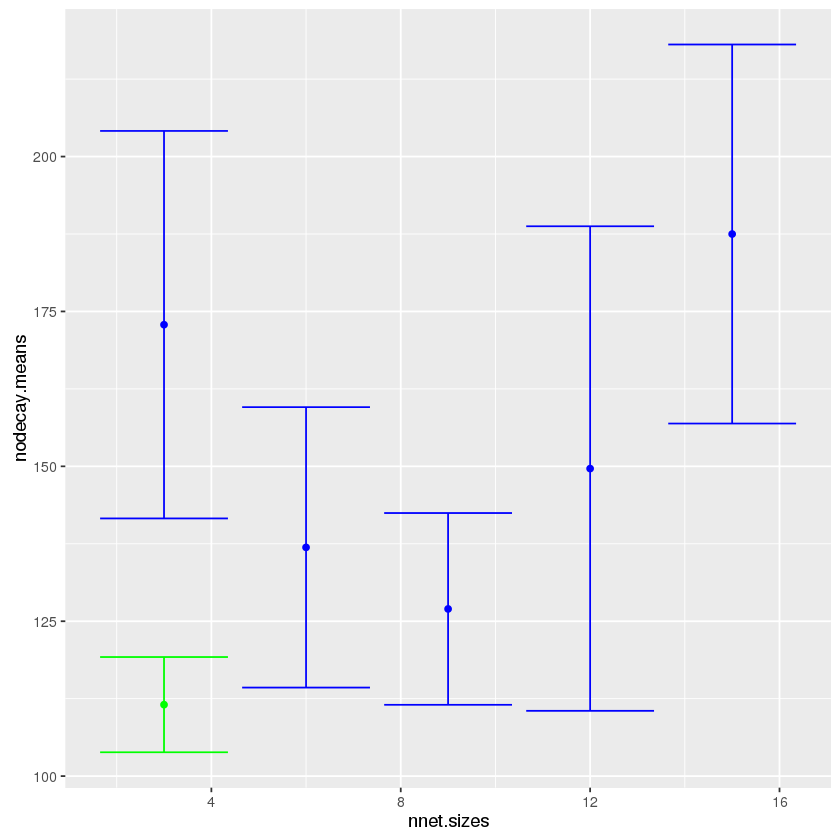

In [39]:
nodecay.means = apply(t(errors.nodecay), 2, mean)
nodecay.sds = apply(t(errors.nodecay), 2, sd)
decay.means = apply(t(errors.decay), 2, mean)
decay.sds = apply(t(errors.decay), 2, sd)
ggplot() + geom_point(aes(x=nnet.sizes,y=nodecay.means),colour="green") + 
geom_errorbar(aes(x=nnet.sizes, ymin=nodecay.means-nodecay.sds, ymax=nodecay.means+nodecay.sds), colour="green") + 
geom_point(aes(x=nnet.sizes,y=decay.means), colour="blue") + 
geom_errorbar(aes(x=nnet.sizes, ymin=decay.means-decay.sds, ymax=decay.means+decay.sds), colour="blue")

In [58]:
nnet.sizes = c(3, 6, 9, 12, 15) # 
nnet.decays = rep(10,6)^(1:-4)
errors.decay = array(rep(NaN, length(nnet.sizes)*k*length(nnet.decays)),c(length(nnet.sizes),k,length(nnet.decays)))
for(d in 1:length(nnet.decays)) {
    nn.decay = nnet.decays[d]
    print(paste("Starting Decay:", nn.decay))
    for(s in 1:length(nnet.sizes)) {
        nn.size = nnet.sizes[s]
        for(i in 1:k) {
            test_.idx = which(folds == i, arr.ind = TRUE) # what is "arr.ind = TRUE" in which function
            test_ = train_test_[test_.idx, ]
            train_ = train_test_[-test_.idx, ]
            model.nnet.decay = nnet(BAD ~ ., data = train_, size = nn.size, decay=nn.decay, maxit=200, trace=FALSE)
            classification.nnet.decay = predict(model.nnet.decay, test_)
            errors.decay[s,i,d] = crossEntropy(classification.nnet.decay, as.numeric(test_$BAD)-1)
        }
    }    
}


[1] "Starting Decay: 10"
[1] "Starting Decay: 1"
[1] "Starting Decay: 0.1"
[1] "Starting Decay: 0.01"
[1] "Starting Decay: 0.001"
[1] "Starting Decay: 1e-04"


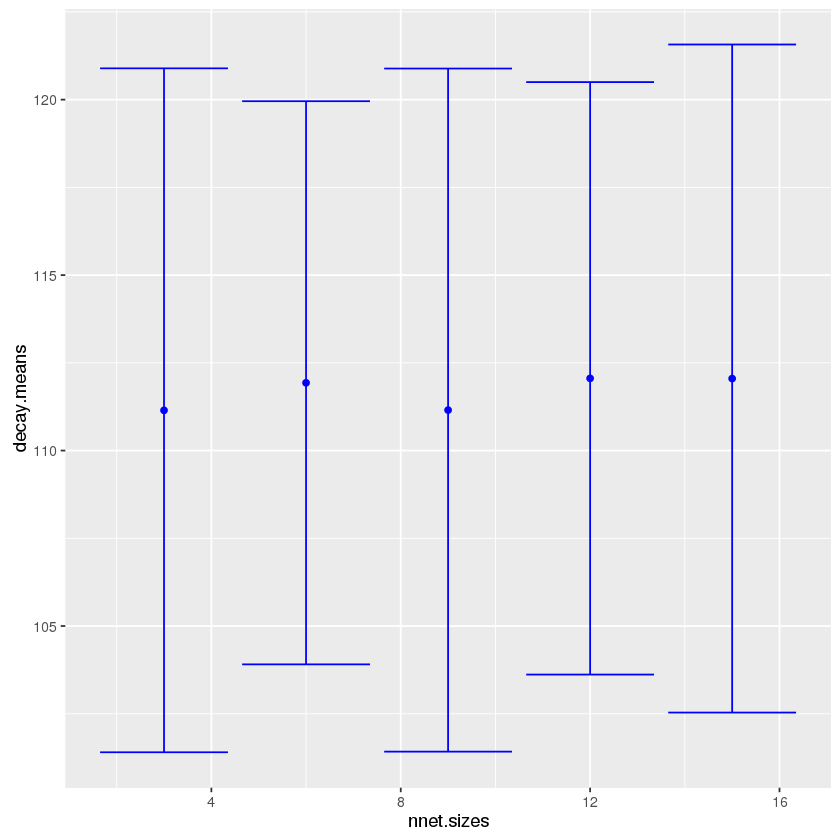

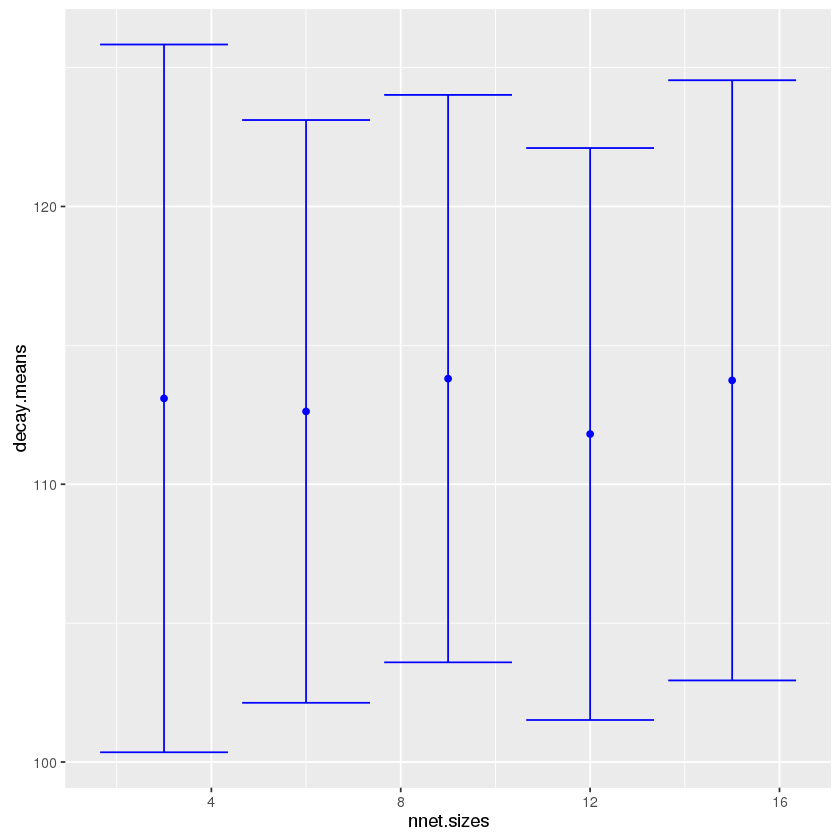

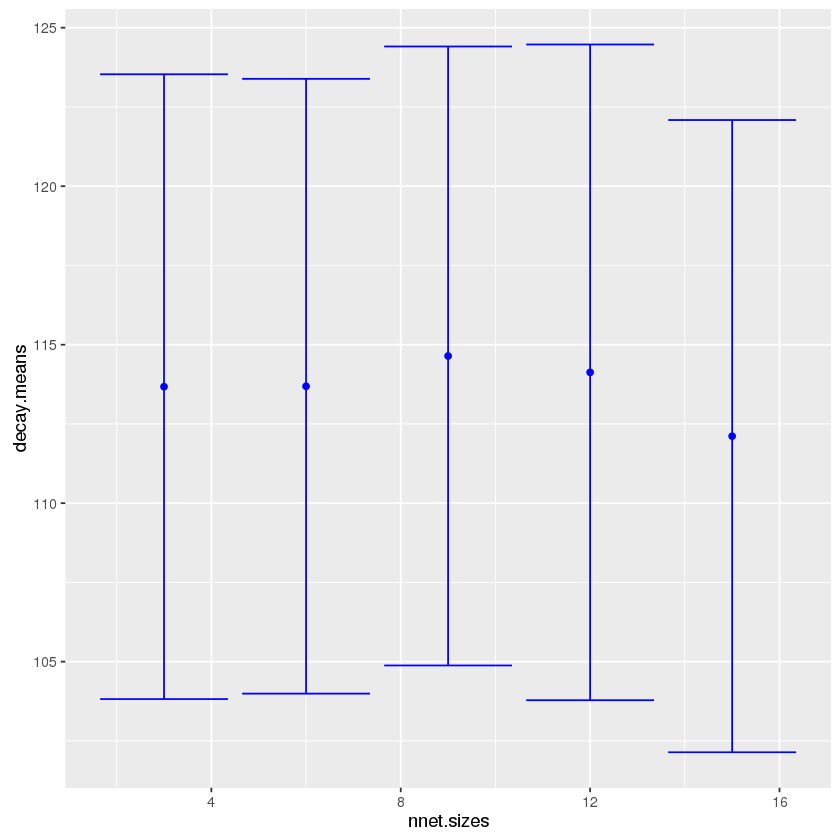

Warning message:
: Removed 1 rows containing missing values (geom_point).Warning message:
: Removed 1 rows containing missing values (geom_errorbar).

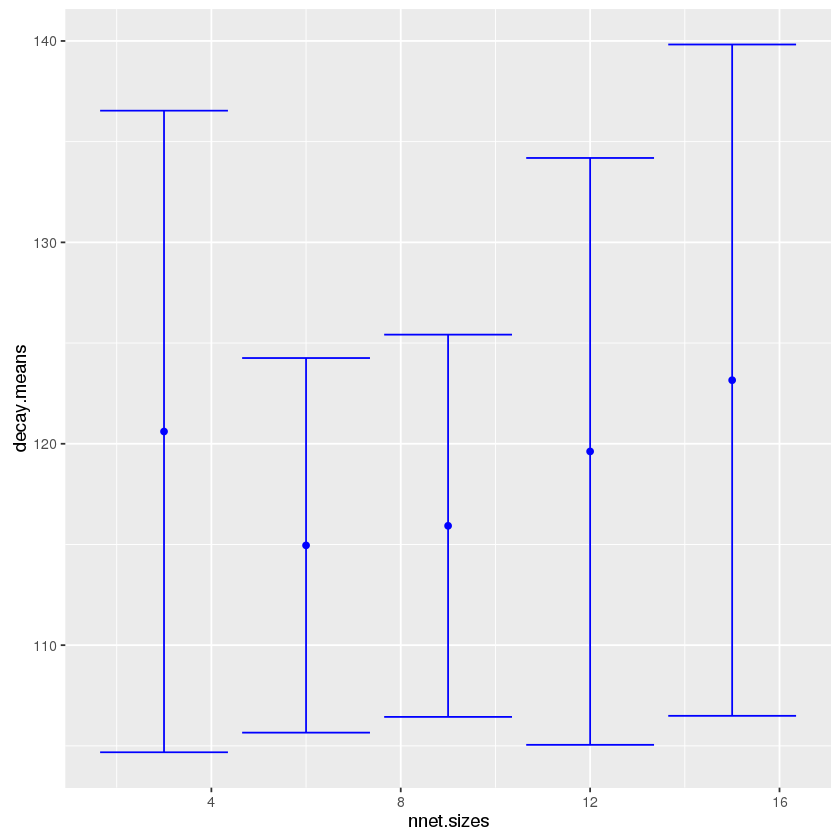

Warning message:
: Removed 3 rows containing missing values (geom_point).Warning message:
: Removed 3 rows containing missing values (geom_errorbar).

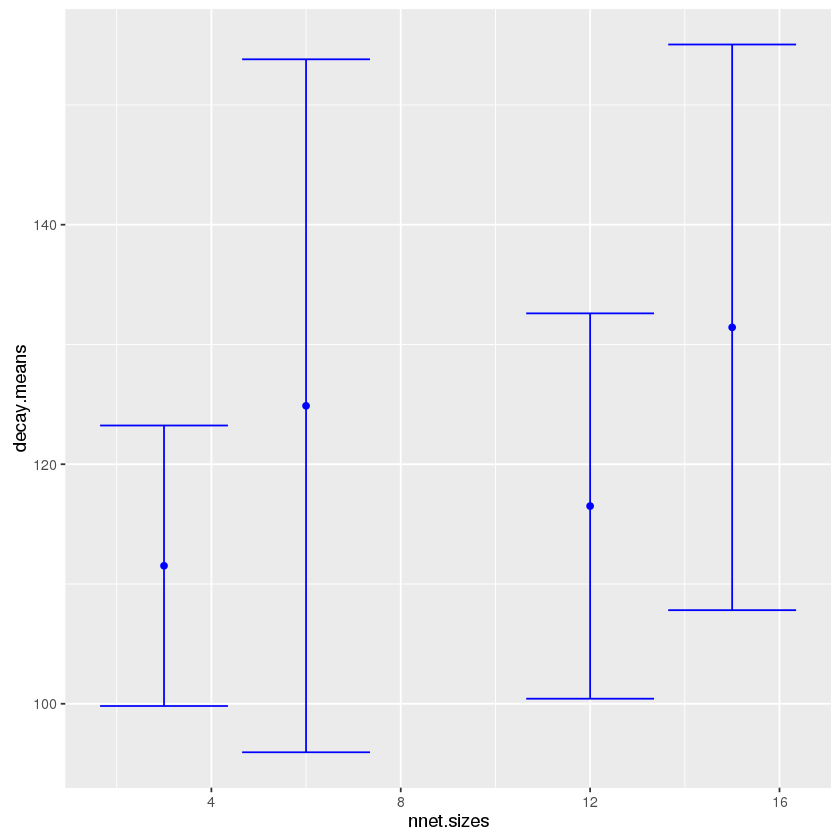

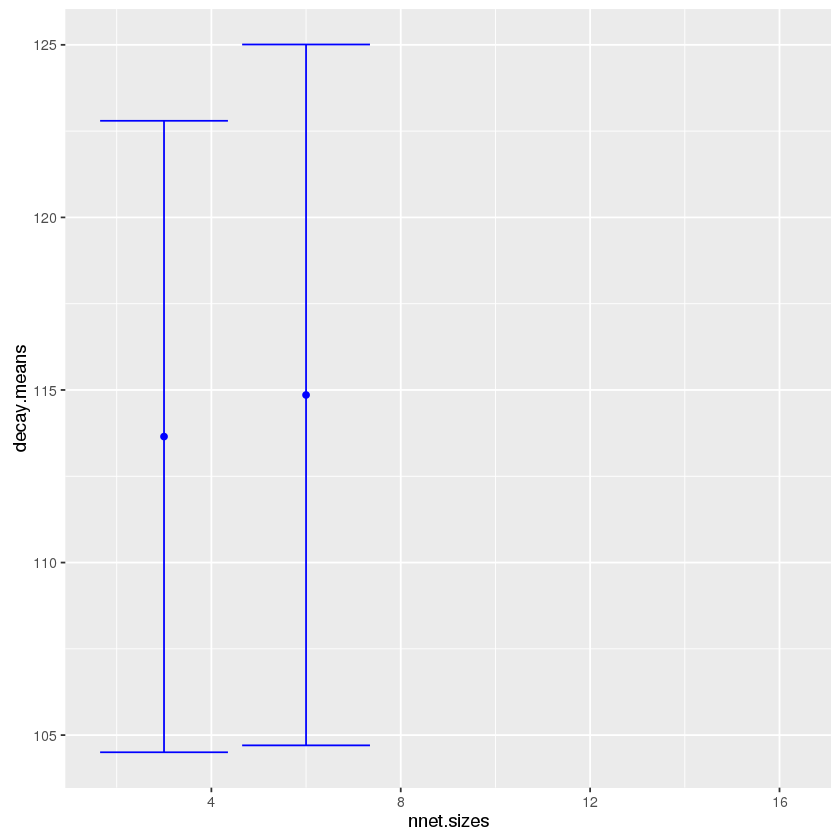

In [62]:
decayLength = 1:length(nnet.decays)
for(i in decayLength) {
    decay.means = apply(t(errors.decay[,,i]), 2, mean)
    decay.sds = apply(t(errors.decay[,,i]), 2, sd)
    x = ((length(nnet.decays)*(i))+(decayLength))
    g = ggplot() +
    geom_point(aes(x=nnet.sizes,y=decay.means), colour="blue") + 
    geom_errorbar(aes(x=nnet.sizes, ymin=decay.means-decay.sds, ymax=decay.means+decay.sds), colour="blue")
    print(g)
}


In [4]:
test_.idx = which(folds==1,arr.ind=T)
test_ = train_test_[test_.idx,]
train_ = train_test_[-test_.idx,]
model.nnet = nnet(BAD ~ ., data = train_, size = 9, maxit=1000, trace=TRUE)
classification.nnet = predict(model.nnet, test_)
model.nnet.decay = nnet(BAD ~ ., data = train_, size = 9, decay=0.01, maxit=1000, trace=TRUE)
classification.nnet.decay = predict(model.nnet.decay, test_)

paste("MSE of nn no decay:", MSE(classification.nnet, as.numeric(test_$BAD)-1))
paste("MSE of nn with decay:", MSE(classification.nnet.decay, as.numeric(test_$BAD)-1))

paste("xEntropy of nn no decay:", crossEntropy(classification.nnet, as.numeric(test_$BAD)-1))
paste("xEntropy of nn with decay:", crossEntropy(classification.nnet.decay, as.numeric(test_$BAD)-1))

# weights:  262
initial  value 544.442988 
iter  10 value 448.594327
iter  20 value 440.554634
iter  30 value 433.790474
iter  40 value 429.055825
iter  50 value 428.548008
iter  60 value 427.070805
iter  70 value 426.455727
iter  80 value 421.611816
iter  90 value 418.191591
iter 100 value 416.772905
iter 110 value 415.158025
iter 120 value 412.547482
iter 130 value 411.213939
iter 140 value 410.517416
iter 150 value 410.111413
iter 160 value 410.012939
iter 170 value 409.301230
iter 180 value 409.185941
iter 190 value 409.072786
iter 200 value 409.062397
iter 210 value 409.050614
iter 220 value 409.014766
iter 230 value 409.000280
iter 240 value 408.952906
iter 250 value 408.942188
iter 260 value 408.940350
iter 270 value 408.934441
iter 280 value 408.932018
iter 290 value 408.363379
iter 300 value 408.359850
iter 310 value 408.019319
iter 320 value 408.016955
iter 330 value 407.835304
iter 340 value 407.833038
iter 350 value 407.831755
iter 360 value 407.830463
iter 370 value 407.83

[1] "MSE of nn no decay: 0.106078524661776"

[1] "MSE of nn with decay: 0.116367030112231"

[1] "xEntropy of nn no decay: NaN"

[1] "xEntropy of nn with decay: 151.402050413994"

In [15]:
?nnet

nnet {nnet},R Documentation
formula,A formula of the form class ~ x1 + x2 + ...
x,matrix or data frame of x values for examples.
y,matrix or data frame of target values for examples.
weights,(case) weights for each example – if missing defaults to 1.
size,number of units in the hidden layer. Can be zero if there are skip-layer units.
data,Data frame from which variables specified in formula are preferentially to be taken.
subset,"An index vector specifying the cases to be used in the training sample. (NOTE: If given, this argument must be named.)"
na.action,"A function to specify the action to be taken if NAs are found. The default action is for the procedure to fail. An alternative is na.omit, which leads to rejection of cases with missing values on any required variable. (NOTE: If given, this argument must be named.)"
contrasts,a list of contrasts to be used for some or all of the factors appearing as variables in the model formula.
Wts,initial parameter vector. If missing chosen at random.


In [22]:
crossEntropy(as.numeric(as.factor(predict(model.nnet.decay, test_, type="class")))-1, as.numeric(test_$BAD)-1)

[1] NaN

# weights:  88
initial  value 573.981844 
iter  10 value 450.984066
iter  20 value 444.902600
iter  30 value 442.939291
iter  40 value 442.372244
iter  50 value 442.082780
iter  60 value 441.744374
iter  70 value 441.446634
iter  80 value 441.195917
iter  90 value 440.421317
final  value 440.420161 
converged


Warning message:
In roc.default(test_$BAD, yhat): Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.


Call:
roc.default(response = test_$BAD, predictor = yhat)

Data: yhat in 135 controls (test_$BAD GOOD) < 61 cases (test_$BAD BAD).
Area under the curve: 0.613

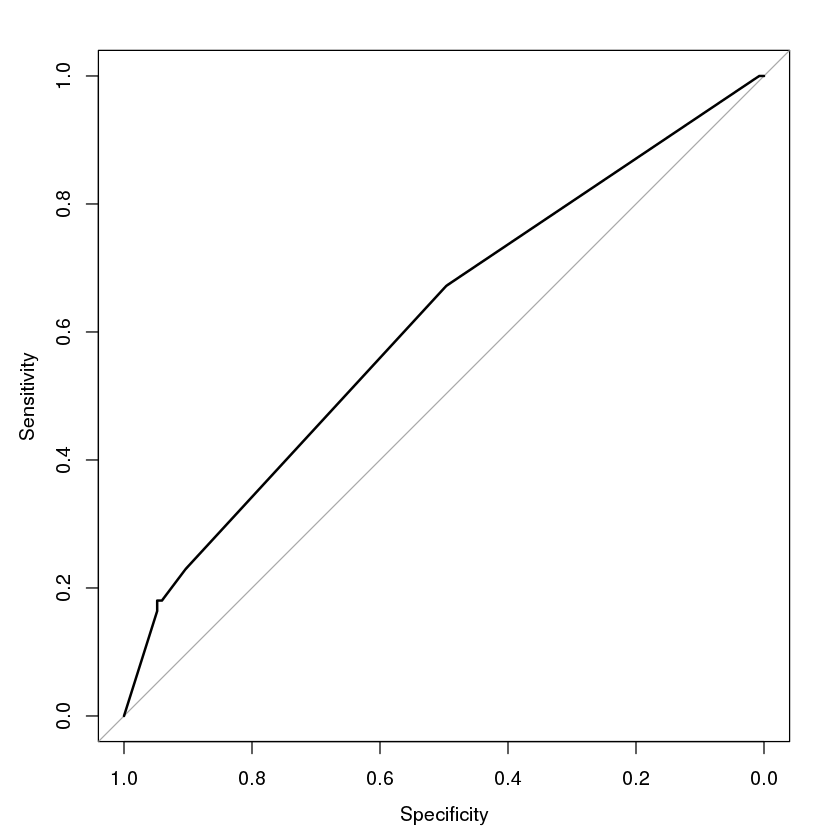

In [10]:
# Notes From Class
model.nnet = nnet(BAD~.,train_,size=3)
yhat = predict(model.nnet,test_)
curve.roc = roc(test_$BAD,yhat)
plot.roc(curve.roc)

# created a function to return the AUC statistic.  Note, return() is not explicit 
# and instead the output is simply the final line of the function.

model.control = trainControl(method = 'cv', number = k, repeats = 1, 
                            summaryFunction = twoClassSummary,
                            classProbs = TRUE)
# twoClassSummary will give us the AUC
#nnet.sizes = c(3, 6, 9, 12, 15) # 
#nnet.decays = rep(10,6)^(1:-4)

#nn.params = expand.grid(nnet.sizes, nnet.decays)
model.nnet.caret = train(BAD~., data=train_, 
                         trControl = model.control, 
                         tuneGrid = nn.params, 
                         metric = 'ROC', 
                         method = 'nnet')

Warning message:
In roc.default(test_$BAD, yhat): Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.


Call:
roc.default(response = test_$BAD, predictor = yhat)

Data: yhat in 135 controls (test_$BAD GOOD) < 61 cases (test_$BAD BAD).
Area under the curve: 0.6013

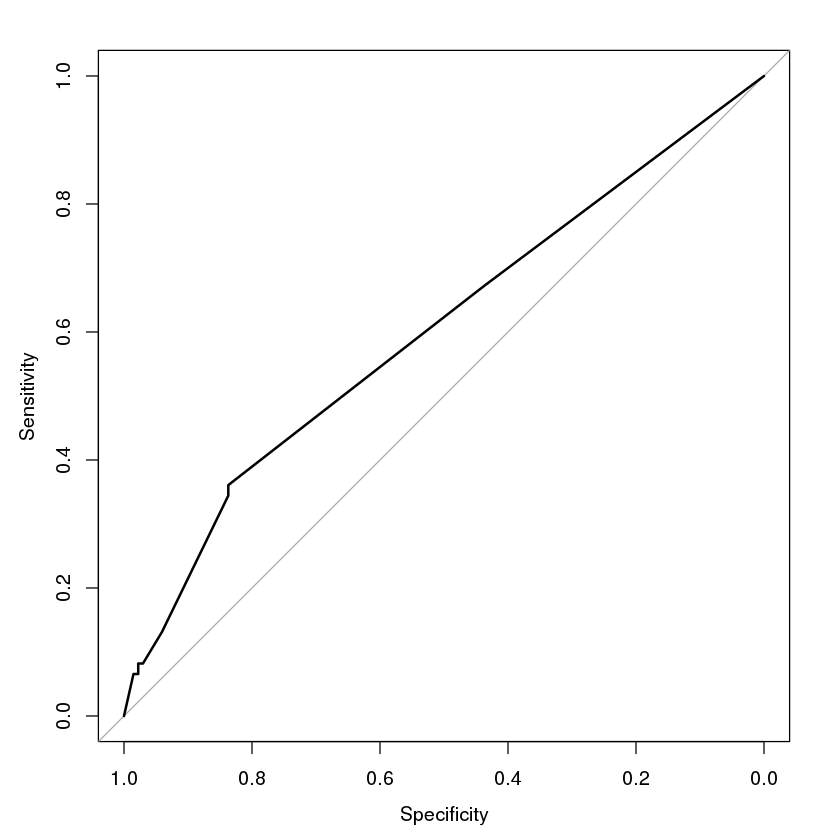

In [11]:
vec = c()
for(k in 1:5){
    for(i in -1:-5) {
        print(paste(k,i))
    }
}

[1] "1 -1"
[1] "1 -2"
[1] "1 -3"
[1] "1 -4"
[1] "1 -5"
[1] "2 -1"
[1] "2 -2"
[1] "2 -3"
[1] "2 -4"
[1] "2 -5"
[1] "3 -1"
[1] "3 -2"
[1] "3 -3"
[1] "3 -4"
[1] "3 -5"
[1] "4 -1"
[1] "4 -2"
[1] "4 -3"
[1] "4 -4"
[1] "4 -5"
[1] "5 -1"
[1] "5 -2"
[1] "5 -3"
[1] "5 -4"
[1] "5 -5"
